In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

---
Nearest Neighbors
=====
***

---
Histogram method of density estimation (non-parameteric methods)
=====
***

###Partition $x$ into $i$ distinct bins of width $d$ - $d_{i}$
###Count the number of observations $m_{i}$ of $x$ falling in each bin $i$
###To turn this count into a probability distribution we simply divide by the bin width and the total number of observations $M$

###$p_{i} = \frac{m_{i}}{M\times d_{i}}$

###Bin width has a huge influence on the ability of this to model a density
###Too narrow a width results in a density model that is very spiky, with structure that is not present in the underlying distribution that generated the data
###Too wide a width results in an overly smooth estimation that fails to capture (for example, in this case) the bimodal nature of the distribution
###Once the histogram has been computed there is no longer any requirement to store the data
###The histogram approach can be easily applied to points arriving sequentially
###This approach does not scale with dimensionality and so is generally unsuited to most applications
###The approach suffers directly from the curse of dimensionality

###Two important things arise from considering this method:

###1. To estimate probability density at a particular location we should consider the data points lying within a local neighborhood of that location
###2. The value of the smoothing parameter (bin width in this case) should neither be too large or too small

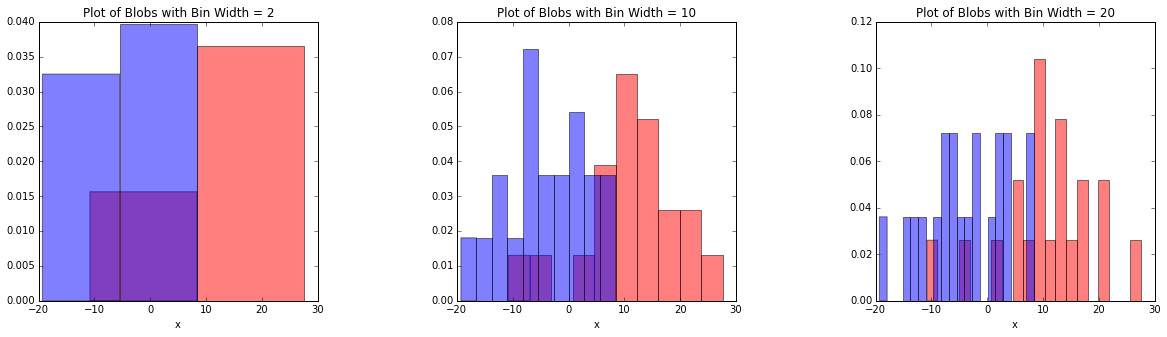

In [3]:
#number of training examples
m = 40

#number of features
N = 1

#number of distinct clusters or groupings or 'blobs'
num_blobs = 2

#using sklearn's 'make_blobs' functionality to make some clusters of data
#blobs also returns an array, y, which contains the identity of the blob each pair of points belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=7.5, random_state=6)

XX = []
XXX = []
for i in xrange(len(X)):
    if y[i]==0:
        XX.append(X[i])
    else:
        XXX.append(X[i])

#Plot the blobs and color them for each blob
fig = plt.figure(figsize = (20, 5))

ax = plt.subplot(131)
bin_width = 2
ax.hist(np.array(XX), bins = bin_width, normed = True, color="red", alpha=0.5)
ax.hist(np.array(XXX), bins = bin_width, normed = True, color="blue", alpha=0.5)
title = "Plot of Blobs with Bin Width = {:d}".format(bin_width)
ax.set_title(title)
ax.set_xlabel('x')


ax = plt.subplot(132)
bin_width = 10
ax.hist(np.array(XX), bins = bin_width, normed = True, color="red", alpha=0.5)
ax.hist(np.array(XXX), bins = bin_width, normed = True, color="blue", alpha=0.5)
title = "Plot of Blobs with Bin Width = {:d}".format(bin_width)
ax.set_title(title)
ax.set_xlabel('x')

ax = plt.subplot(133)
bin_width = 20
ax.hist(np.array(XX), bins = bin_width, normed = True, color="red", alpha=0.5)
ax.hist(np.array(XXX), bins = bin_width, normed = True, color="blue", alpha=0.5)
title = "Plot of Blobs with Bin Width = {:d}".format(bin_width)
ax.set_title(title)
ax.set_xlabel('x')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

---
K-Nearest Neighbor
=====
***

###Suppose you have $M$ points, and $k$ classes
###$N_{k}$ represent the number of points in each class
###So $\sum_{i=1}N_{k} = N$
###Suppose we take a point $x$ within an area (e.g. a histogram bin) or a volume in higher dimensional space,  $V$
###$K$ represents the number of points within that area or volume
###Then, as we saw above
###$p(x) = \frac{K}{NV}$
###$p(x|C_{k}) = \frac{K_{k}}{N_{k}V}$
###$p(C_{k})=\frac{N_k}{N}$
###Therefore:
###$$p(C_k|x) = \frac{p(x|C_{k})p(C_{k})}{p(x)} = \frac{K_{k}}{K}$$

##To classify a new point we identify the K nearest points from the training set and assign the new point to the class having the largest number of representatives within this set

###The case where $K=1$ is called the 'nearest-neighbor' rule, because a test point is simply assigned to the same class as the nearest point from the training set

###For the K-NN algorithm $K$ controls the degree of smoothing:
###- small $K$ produces many small regions of each class
###- large $K$ leads to fewer, larger regions
###- requires the entire training set to be stored
###- computational expense increases with the size of the training set
### - this is a severe limitation

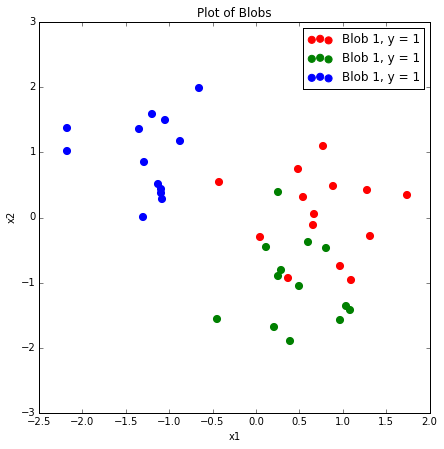

In [4]:
#number of training examples
m = 40

#number of features
N = 2

#number of distinct clusters or groupings or 'blobs'
num_blobs = 3

#using sklearn's 'make_blobs' functionality to make some clusters of data
#blobs also returns an array, y, which contains the identity of the blob each pair of points belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=3.5, random_state=6)

scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
X_scaled = scaler.transform(X)

color_list = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta', 'cyan']

#Plot the blobs and color them for each blob
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
for i in xrange(num_blobs):
    ax.scatter(X_scaled[y == i,0], X_scaled[y == i,1], color=color_list[i], s=50, label='Blob 1, y = 1')

ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
#ax.set_xlim(-)
ax.legend(loc='best')

In [5]:
#Fit a basic logistic regression model
clf = KNeighborsClassifier(1) 
clf.fit(X_scaled, y)

#A confusion matrix indicates the results of classification
#pd.crosstab returns a DataFrame
cm = pd.crosstab(y, clf.predict(X_scaled), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1,2
Actual,,,
0,14,0,0
1,0,13,0
2,0,0,13


#####Compare the decision boundary for when k is small to when k is large

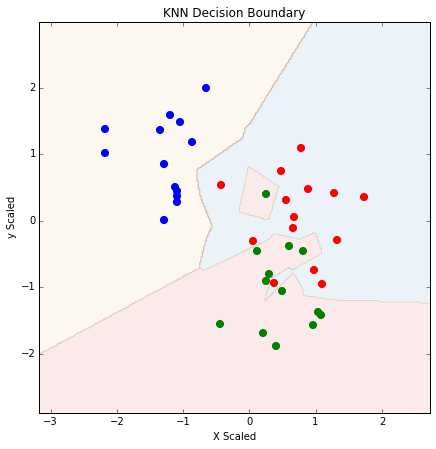

In [6]:
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)

#find the limits required for the plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

#step size for the mesh
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#predict over the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)

color_list = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta', 'cyan']

#re-plot the points
for i in xrange(num_blobs):
    ax.scatter(X_scaled[y == i,0], X_scaled[y == i,1], color=color_list[i], s=50, label='Blob 1, y = 1')


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("KNN Decision Boundary")
ax.set_xlabel("X Scaled")
ax.set_ylabel("y Scaled")